In [175]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [176]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [177]:
IMAGE_SIZE = [224, 224]
train_path = 'train'
valid_path = 'validation'

In [183]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [184]:
for layer in resnet.layers:
    layer.trainable = False

In [185]:

folders = glob('train/*')

In [186]:
folders

['train\\Healthy',
 'train\\Mild Bacterial blight',
 'train\\Mild Blast',
 'train\\Mild Brownspot',
 'train\\Mild Tungro',
 'train\\Severe Bacterial blight',
 'train\\Severe Blast',
 'train\\Severe Brownspot',
 'train\\Severe Tungro']

In [187]:

x = Flatten()(resnet.output)

In [188]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=prediction)

In [189]:
prediction

<KerasTensor: shape=(None, 9) dtype=float32 (created by layer 'dense_1')>

In [190]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [191]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [192]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                  )

test_datagen = ImageDataGenerator(rescale = 1./255)

In [193]:
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2826 images belonging to 9 classes.


In [194]:
test_set = test_datagen.flow_from_directory('validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',shuffle=False)

Found 180 images belonging to 9 classes.


In [195]:
test_set.filenames

['Healthy\\IMG_20190419_172952.jpg',
 'Healthy\\IMG_20190419_173344.jpg',
 'Healthy\\IMG_20190419_173904.jpg',
 'Healthy\\IMG_20190419_174133.jpg',
 'Healthy\\IMG_20190419_174218.jpg',
 'Healthy\\IMG_20190419_174308.jpg',
 'Healthy\\IMG_20190420_193425.jpg',
 'Healthy\\IMG_20190420_194105.jpg',
 'Healthy\\IMG_20190420_194338.jpg',
 'Healthy\\IMG_20190420_200326.jpg',
 'Healthy\\IMG_20190420_200436.jpg',
 'Healthy\\IMG_20190420_200508.jpg',
 'Healthy\\IMG_20190421_195322.jpg',
 'Healthy\\IMG_20190424_125921.jpg',
 'Healthy\\IMG_20190424_130047.jpg',
 'Healthy\\IMG_20190424_130138.jpg',
 'Healthy\\IMG_20190424_130226.jpg',
 'Healthy\\IMG_20190424_130350.jpg',
 'Healthy\\IMG_20190424_130430.jpg',
 'Healthy\\IMG_20190424_130546.jpg',
 'Mild Bacterial blight\\BACTERAILBLIGHT4_167.jpg',
 'Mild Bacterial blight\\BACTERAILBLIGHT4_183.jpg',
 'Mild Bacterial blight\\BACTERAILBLIGHT4_187.jpg',
 'Mild Bacterial blight\\BACTERAILBLIGHT4_191.jpg',
 'Mild Bacterial blight\\BACTERAILBLIGHT4_192.jpg',


In [196]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\HOME\AppData\Local\Temp\ipykernel_6480\1167563505.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
89/89 [==============================] - 224s 2s/step - loss: 4.4857 - accuracy: 0.2668 - val_loss: 2.1229 - val_accuracy: 0.2611
Epoch 2/50
89/89 [==============================] - 213s 2s/step - loss: 1.9561 - accuracy: 0.3857 - val_loss: 1.5236 - val_accuracy: 0.4944
Epoch 3/50
89/89 [==============================] - 212s 2s/step - loss: 1.8188 - accuracy: 0.4246 - val_loss: 1.9179 - val_accuracy: 0.3667
Epoch 4/50
89/89 [==============================] - 213s 2s/step - loss: 1.7005 - accuracy: 0.4611 - val_loss: 2.0765 - val_accuracy: 0.4611
Epoch 5/50
89/89 [==============================] - 215s 2s/step - loss: 1.8415 - accuracy: 0.4759 - val_loss: 1.6275 - val_accuracy: 0.4556
Epoch 6/50
89/89 [==============================] - 214s 2s/step - loss: 1.6769 - accuracy: 0.4781 - val_loss: 1.2561 - val_accuracy: 0.5667
Epoch 7/50
89/89 [==============================] - 215s 2s/step - loss: 1.4423 - accuracy: 0.5333 - val_loss: 1.3677 - val_accuracy: 0.5389
Epoch 8/50
89

In [197]:
import matplotlib.pyplot as plt

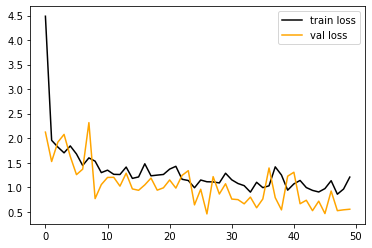

<Figure size 432x288 with 0 Axes>

In [198]:
plt.plot(r.history['loss'], label='train loss',color="black")
plt.plot(r.history['val_loss'], label='val loss',color="orange")
plt.legend()
plt.show()
plt.savefig('LossVal_loss')




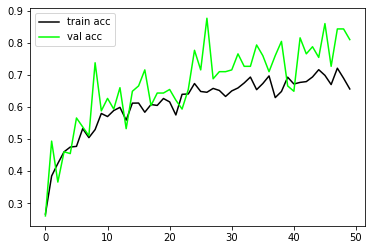

<Figure size 432x288 with 0 Axes>

In [199]:
plt.plot(r.history['accuracy'], label='train acc',color="black")
plt.plot(r.history['val_accuracy'], label='val acc',color="lime")
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [200]:

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [201]:
model=load_model('model_resnet50.h5')

In [202]:
y_pred = model.predict(test_set)
y_pred

6/6 [==============================] - 14s 2s/step


array([[9.9997592e-01, 8.6517794e-08, 1.3773455e-05, ..., 1.0202564e-05,
        1.8962443e-13, 7.3618516e-12],
       [1.0000000e+00, 1.9170253e-10, 1.8916328e-10, ..., 2.6390579e-09,
        3.9452821e-15, 2.3278297e-15],
       [1.0000000e+00, 1.1426872e-19, 6.8453376e-13, ..., 1.9629748e-08,
        3.4746714e-20, 8.3837107e-20],
       ...,
       [1.4615090e-12, 2.5406261e-03, 2.4678369e-04, ..., 6.6071592e-04,
        3.3557601e-05, 8.9818686e-01],
       [7.6533020e-08, 4.6050414e-03, 4.3031067e-04, ..., 6.3193031e-04,
        3.9561332e-04, 9.8885894e-01],
       [2.1528716e-07, 7.3573850e-03, 1.1525093e-02, ..., 2.6366675e-01,
        1.4070777e-02, 1.3689015e-03]], dtype=float32)

In [203]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 6, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 2, 2, 2, 2, 2, 7, 2,
       2, 7, 2, 7, 3, 5, 7, 2, 2, 7, 7, 7, 2, 7, 4, 1, 4, 4, 8, 8, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6,
       6, 6, 2, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       5, 7, 7, 7, 7, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 4], dtype=int64)

In [204]:
import os
path ='validation'
Diseases_types=os.listdir(path)

In [205]:
diseases = []
for i in Diseases_types:
  all_images = os.listdir(path + '/' +i)

  for j in all_images :
    diseases.append((i))
    print (diseases)

['Healthy']
['Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy

In [206]:
diseases

['Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Healthy',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Bacterial blight',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',
 'Mild Blast',


In [207]:
from sklearn.preprocessing import LabelEncoder
diseases = np.array(diseases)
diseases.reshape(180,-1)
y_labelencoder = LabelEncoder()



In [208]:
diseases

array(['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Bacterial blight',
       'Mild Bacterial blight', 'Mild Blast', 'Mild Blast', 'Mild Blast',
       'Mild Blast', 'Mild Blast', 'Mild Blast', 'Mild Blast',
       'Mild Blast', 'Mild Blast', 'Mild Blast', 'Mild Blast',
       'Mild B

In [209]:
y_test = y_labelencoder.fit_transform (diseases)
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8], dtype=int64)

In [210]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[18,  0,  2,  0,  0,  0,  0,  0,  0],
       [ 0, 19,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0, 17,  0,  0,  0,  3,  0,  0],
       [ 0,  0, 10,  1,  0,  1,  0,  8,  0],
       [ 0,  1,  0,  0, 17,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0, 19,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  1, 18,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  0, 18,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0, 19]], dtype=int64)

In [211]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.86      0.95      0.90        20
           2       0.57      0.85      0.68        20
           3       1.00      0.05      0.10        20
           4       0.94      0.85      0.89        20
           5       0.83      0.95      0.88        20
           6       0.86      0.90      0.88        20
           7       0.69      0.90      0.78        20
           8       0.90      0.95      0.93        20

    accuracy                           0.81       180
   macro avg       0.85      0.81      0.78       180
weighted avg       0.85      0.81      0.78       180



In [212]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7133333333333334

In [213]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred,average='micro')

0.8111111111111111

In [214]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8111111111111111

In [215]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average='micro')

0.8111111111111111

In [216]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred,average='micro')

0.8111111111111111

In [217]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [218]:
from sklearn.metrics import confusion_matrix
import pandas as pd
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Healthy','Mild Bacterial blight','Mild Blast','Mild Brownspot','Mild Tungro','Severe Bacterial blight','Severe Blast','Severe Brownspot','Severe Tungro'], 
                     columns = ['Healthy','Mild Bacterial blight','Mild Blast','Mild Brownspot','Mild Tungro','Severe Bacterial blight','Severe Blast','Severe Brownspot','Severe Tungro'])

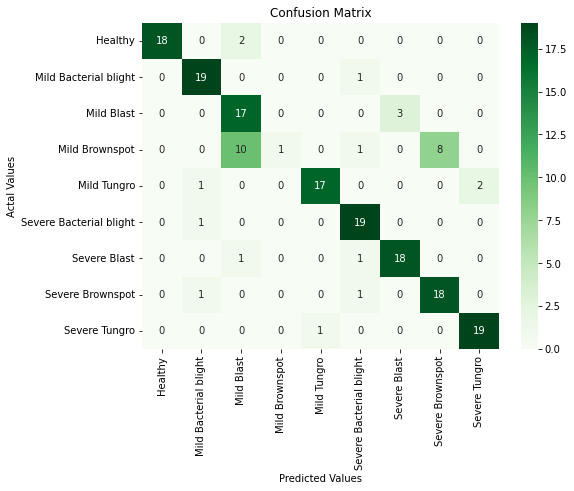

In [219]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="Greens")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [220]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [221]:
img=image.load_img('test_img.jpg',target_size=(224,224))

In [222]:
x=image.img_to_array(img)
x

array([[[223., 229., 243.],
        [226., 232., 248.],
        [216., 222., 236.],
        ...,
        [236., 239., 246.],
        [253., 254., 255.],
        [243., 242., 250.]],

       [[222., 228., 244.],
        [220., 226., 240.],
        [225., 231., 247.],
        ...,
        [236., 239., 246.],
        [246., 246., 254.],
        [237., 236., 244.]],

       [[223., 229., 243.],
        [225., 231., 247.],
        [227., 233., 247.],
        ...,
        [243., 243., 251.],
        [236., 239., 246.],
        [247., 246., 254.]],

       ...,

       [[229., 235., 247.],
        [223., 229., 241.],
        [218., 224., 236.],
        ...,
        [222., 228., 240.],
        [234., 240., 252.],
        [237., 243., 255.]],

       [[237., 236., 250.],
        [220., 220., 232.],
        [226., 225., 239.],
        ...,
        [227., 233., 245.],
        [234., 240., 252.],
        [240., 239., 253.]],

       [[229., 228., 242.],
        [235., 235., 247.],
        [231., 2

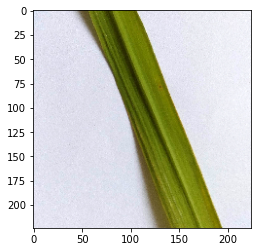

In [223]:
from matplotlib.pyplot import imshow
imshow(img)

In [224]:
x=x/255

In [225]:
x


array([[[0.8745098 , 0.8980392 , 0.9529412 ],
        [0.8862745 , 0.9098039 , 0.972549  ],
        [0.84705883, 0.87058824, 0.9254902 ],
        ...,
        [0.9254902 , 0.9372549 , 0.9647059 ],
        [0.99215686, 0.99607843, 1.        ],
        [0.9529412 , 0.9490196 , 0.98039216]],

       [[0.87058824, 0.89411765, 0.95686275],
        [0.8627451 , 0.8862745 , 0.9411765 ],
        [0.88235295, 0.90588236, 0.96862745],
        ...,
        [0.9254902 , 0.9372549 , 0.9647059 ],
        [0.9647059 , 0.9647059 , 0.99607843],
        [0.92941177, 0.9254902 , 0.95686275]],

       [[0.8745098 , 0.8980392 , 0.9529412 ],
        [0.88235295, 0.90588236, 0.96862745],
        [0.8901961 , 0.9137255 , 0.96862745],
        ...,
        [0.9529412 , 0.9529412 , 0.9843137 ],
        [0.9254902 , 0.9372549 , 0.9647059 ],
        [0.96862745, 0.9647059 , 0.99607843]],

       ...,

       [[0.8980392 , 0.92156863, 0.96862745],
        [0.8745098 , 0.8980392 , 0.94509804],
        [0.85490197, 0

In [226]:
import cv2
x = cv2.resize(x,(224,224)) 
x = x.reshape(1,224,224,3) 

In [227]:
x.shape

(1, 224, 224, 3)

In [228]:
model.predict(x)

1/1 [==============================] - 1s 855ms/step


array([[1.0000000e+00, 4.4297344e-09, 6.0492278e-11, 1.2813225e-18,
        1.4223265e-17, 2.0014268e-09, 2.5007791e-09, 5.5582748e-12,
        2.1001991e-13]], dtype=float32)

In [229]:
a=model.predict(x)

1/1 [==============================] - 0s 93ms/step


In [230]:
a.argmax()

0

In [231]:
folders

['train\\Healthy',
 'train\\Mild Bacterial blight',
 'train\\Mild Blast',
 'train\\Mild Brownspot',
 'train\\Mild Tungro',
 'train\\Severe Bacterial blight',
 'train\\Severe Blast',
 'train\\Severe Brownspot',
 'train\\Severe Tungro']